In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime

dataset = pd.read_csv("QVI_data.csv")
dataset


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,17-10-2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,16-09-2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,07-03-2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,08-03-2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,02-11-2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,08-12-2018,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,01-10-2018,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,24-10-2018,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,27-10-2018,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [2]:
#CREATING A MOMTH AND YEAR COLUMN


dataset["DATE"] = pd.to_datetime(dataset['DATE'])
dataset["MONTH_YEAR"] = dataset["DATE"].dt.strftime("%m/%Y")
dataset["MONTH_YEAR"]

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5108\505670876.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset["DATE"] = pd.to_datetime(dataset['DATE'])


0         10/2018
1         09/2018
2         07/2019
3         08/2019
4         02/2018
           ...   
264829    08/2018
264830    01/2018
264831    10/2018
264832    10/2018
264833    12/2018
Name: MONTH_YEAR, Length: 264834, dtype: object

In [3]:
#GROUPING STORE NUMBER AND MONTH YEAR

chips_grp_before = dataset.groupby(["STORE_NBR", "MONTH_YEAR"])
total_grp = chips_grp_before["TOT_SALES"].sum()
total_grp

STORE_NBR  MONTH_YEAR
1          01/2018        76.0
           01/2019       116.1
           02/2018        42.6
           02/2019       159.0
           03/2018        45.5
                         ...  
272        10/2019        98.8
           11/2018       318.3
           11/2019       116.9
           12/2018       345.3
           12/2019        64.6
Name: TOT_SALES, Length: 6220, dtype: float64

In [4]:
#TOTAL SALES BY STORE NUMBER

chips_grp_sales = dataset.groupby("STORE_NBR")
total_sales = chips_grp_sales["TOT_SALES"].sum()
total_sales

STORE_NBR
1       2393.60
2       2005.80
3      12802.45
4      14647.65
5       9500.80
         ...   
268     2601.05
269    11221.80
270    11293.95
271     9721.80
272     4653.95
Name: TOT_SALES, Length: 272, dtype: float64

In [5]:
#FINDING TOTAL SALES IN TRIAL STORES

trial_store = total_sales[76:88]
trial_store

STORE_NBR
77     3040.00
78     9381.25
79    11831.20
80    11756.90
81    14361.95
82     4103.50
83     9924.90
84     5396.30
85       13.90
86    10635.35
87     3991.60
88    16333.25
Name: TOT_SALES, dtype: float64

In [6]:
#SORTING STORES BY TOTAL SALES LOOKING FOR A MATCH FOR STORE 77

total_sorted = total_sales.sort_values(ascending=True)
total_sorted.iloc[57:75]

STORE_NBR
41     2570.20
268    2601.05
195    2608.25
163    2635.70
6      2684.90
53     2715.05
214    2720.40
176    2752.90
233    2826.90
255    2835.30
185    2868.60
187    2909.70
205    2966.80
220    3008.20
50     3009.80
46     3023.45
141    3025.40
77     3040.00
Name: TOT_SALES, dtype: float64

In [7]:
#ISOLATING THE STORES

stores_control_one = [41, 268, 163, 6, 53, 214, 176, 233, 255, 185, 187, 205, 220, 50, 46, 141, 77]
control_one = pd.DataFrame({"Value" : total_grp[stores_control_one]})
print(control_one)


                      Value
STORE_NBR MONTH_YEAR       
41        01/2018      10.1
          01/2019     135.3
          02/2018      55.8
          02/2019     136.4
          03/2018      51.2
...                     ...
77        10/2019      46.8
          11/2018     176.7
          11/2019      28.7
          12/2018     207.6
          12/2019      37.0

[408 rows x 1 columns]


In [8]:
#PUTTING THE STORES IN PIVOT CHART FORMAT

pivot_chips1 = control_one.pivot_table(index= "MONTH_YEAR", columns= "STORE_NBR", values= "Value")
pivot_chips1

STORE_NBR,6,41,46,50,53,77,141,163,176,185,187,205,214,220,233,255,268
MONTH_YEAR,,,,,,,,,,,,,,,,,
01/2018,35.2,10.1,75.00,39.6,34.10,25.9,20.2,39.2,43.4,69.4,45.9,27.1,59.6,77.4,87.1,35.6,34.90
01/2019,142.3,135.3,149.40,194.4,96.40,204.1,257.7,156.8,173.2,208.1,197.2,176.8,189.3,176.0,161.1,187.4,140.20
02/2018,39.8,55.8,54.70,41.6,71.40,35.4,47.4,40.2,19.9,37.4,74.1,44.7,32.2,46.0,39.1,57.7,27.10
02/2019,152.1,136.4,170.10,119.5,151.60,155.0,236.1,160.6,206.4,174.0,152.6,215.5,215.5,113.5,206.8,201.6,132.00
03/2018,53.1,51.2,58.90,33.3,76.80,73.8,62.8,66.7,53.6,12.6,71.7,50.3,35.9,27.0,27.0,21.8,41.50
03/2019,197.9,153.1,239.10,206.2,215.80,208.6,205.2,206.4,174.3,207.1,240.1,265.6,203.4,231.3,142.8,185.0,218.70
04/2018,24.0,81.4,26.30,61.8,73.70,31.6,42.7,37.3,55.0,53.7,24.1,60.0,71.8,65.0,37.9,34.3,68.80
04/2019,137.3,169.1,232.30,197.9,187.00,225.2,158.0,164.5,187.6,192.3,170.7,104.8,214.0,163.6,109.0,171.2,159.20
05/2018,54.6,18.5,47.30,59.4,47.40,75.1,34.6,64.4,32.1,30.5,49.3,50.1,36.6,61.7,53.3,35.1,27.10


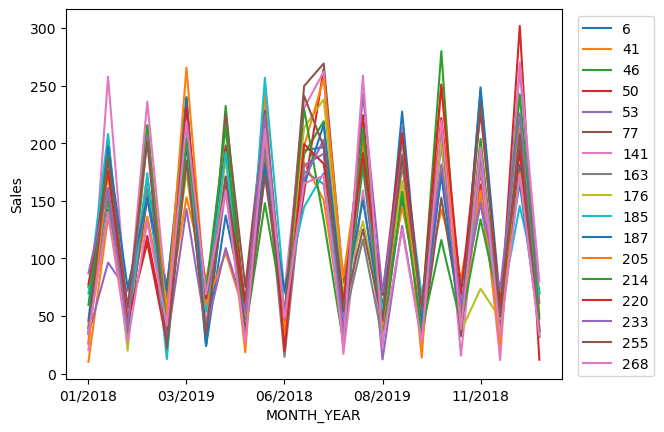

In [9]:
pivot_chips1.plot()
plt.legend(loc = "upper right", bbox_to_anchor = (1.20, 1))
plt.ylabel("Sales")
plt.show()

In [10]:
#FINDING CORRELATIONS
pivot_chips1.corr(method = "pearson")


STORE_NBR,6,41,46,50,53,77,141,163,176,185,187,205,214,220,233,255,268
STORE_NBR,,,,,,,,,,,,,,,,,
6,1.000000,0.896563,0.938875,0.877165,0.886240,0.896637,0.886155,0.941874,0.818345,0.862069,0.929033,0.910844,0.821500,0.943379,0.883235,0.938846,0.949664
41,0.896563,1.000000,0.848848,0.836962,0.899279,0.885951,0.822014,0.882724,0.827431,0.897990,0.819445,0.838382,0.841942,0.882512,0.852135,0.854749,0.910830
46,0.938875,0.848848,1.000000,0.889719,0.896320,0.888652,0.886954,0.948487,0.876267,0.874179,0.908808,0.904626,0.826356,0.930638,0.832569,0.923127,0.920338
50,0.877165,0.836962,0.889719,1.000000,0.901071,0.904862,0.884443,0.886059,0.873404,0.843247,0.860935,0.890107,0.835757,0.899528,0.883559,0.859718,0.881861
53,0.886240,0.899279,0.896320,0.901071,1.000000,0.872874,0.850130,0.892430,0.859006,0.804669,0.804745,0.880721,0.876091,0.849591,0.841147,0.835500,0.907182
77,0.896637,0.885951,0.888652,0.904862,0.872874,1.000000,0.905392,0.911136,0.913635,0.874755,0.906883,0.890045,0.865518,0.877775,0.847709,0.902042,0.862062
141,0.886155,0.822014,0.886954,0.884443,0.850130,0.905392,1.000000,0.909185,0.913335,0.838715,0.888996,0.915215,0.877468,0.832482,0.861008,0.936142,0.826970
163,0.941874,0.882724,0.948487,0.886059,0.892430,0.911136,0.909185,1.000000,0.885836,0.875933,0.933498,0.913060,0.847095,0.942742,0.847019,0.952092,0.882085
176,0.818345,0.827431,0.876267,0.873404,0.859006,0.913635,0.913335,0.885836,1.000000,0.851151,0.796281,0.903552,0.855098,0.816341,0.863952,0.882025,0.807372


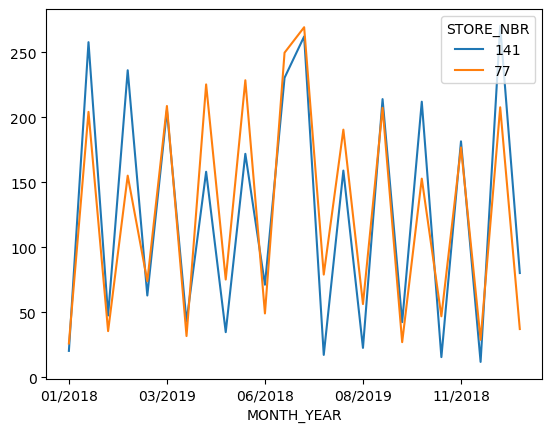

In [11]:
#STRONG CORRELATION BETWEEN STORES 141 AND 77 AT 0.889
#GRAPHICAL REPRESENTATION
chips1_graph = pivot_chips1[[141, 77]]
chips1_graph.plot()
plt.show()

In [12]:
#CHECKING CORRELATION OF ENTIRE TABLE INCASE WE MISSED A POINT

total_grp_df = pd.DataFrame(total_grp)
total_grp_pivot = total_grp_df.pivot_table(index="MONTH_YEAR", columns= "STORE_NBR", values= "TOT_SALES")
total_grp_pivot_table = total_grp_pivot.corr(method = "pearson")
total_grp_pivot_table[77].sort_values(ascending=False).head(10)

STORE_NBR
193    1.000000
31     1.000000
77     1.000000
11     1.000000
63     0.969215
271    0.968093
81     0.967501
166    0.963781
183    0.960744
67     0.959635
Name: 77, dtype: float64

In [13]:
#IT SEEMS 77 AND 63 CAN BE STRONG CORRELATION. LOOKING AT OTHER STORES

total_sorted.loc[[193, 31,77, 11, 63, 271]]

 

STORE_NBR
193       13.1
31        14.8
77      3040.0
11         6.7
63     12085.0
271     9721.8
Name: TOT_SALES, dtype: float64

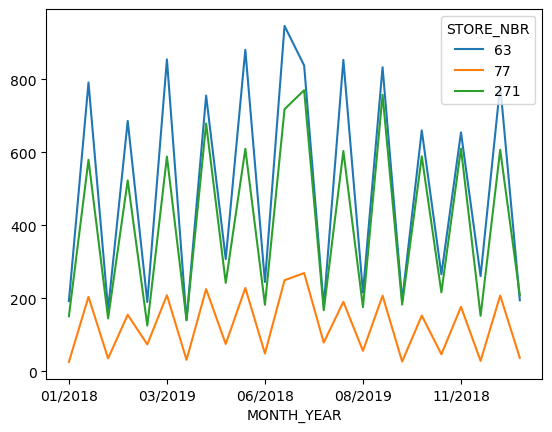

In [14]:
#CONCLUSION: SALES OF 193, 31 AND 11 ARE TOO LOW
#GROUPING 77, 63 AND 271 TOGETHER
three_group_77 = total_grp[[77, 63, 271]]

#CREATING DATAFRAME
group_77_df = pd.DataFrame(three_group_77)

#PIVOTING THE DATAFRAME
group_77_pivot = group_77_df.pivot_table(index = "MONTH_YEAR", columns = "STORE_NBR", values = "TOT_SALES")
group_77_pivot.plot()
plt.show()

In [15]:
#THROUGH THE GRAPH ITS CLEAR THAT FOR TRIAL 77, 271 IS MUCH BETTER OPTION COMPARED TO 63 AS ITS CORRELATION IS BETTER
total_sorted.iloc[178:201]

STORE_NBR
109    10399.10
191    10404.70
196    10408.20
229    10417.90
97     10432.05
102    10440.70
105    10472.50
232    10485.30
57     10532.30
172    10545.60
113    10551.60
225    10566.60
62     10583.10
236    10621.00
227    10622.50
155    10628.95
86     10635.35
247    10651.50
13     10686.50
164    10718.90
106    10742.60
55     10760.15
138    10824.80
Name: TOT_SALES, dtype: float64

In [16]:
store_control_two = [109, 
191,
196 ,   
229  ,  
97    , 
102   ,
105,
232 ,   
57,  
172,    
113,    
225,    
62,     
236,    
227,    
155,    
86,     
247,  
13,     
164,    
106,   
55,     
138,    ]

control_two = pd.DataFrame({"Value": total_grp[store_control_two]})
print(control_two)

                      Value
STORE_NBR MONTH_YEAR       
109       01/2018     203.4
          01/2019     674.2
          02/2018     163.2
          02/2019     720.0
          03/2018     137.6
...                     ...
138       10/2019     192.8
          11/2018     714.0
          11/2019     179.6
          12/2018     734.4
          12/2019     156.8

[552 rows x 1 columns]


In [17]:
#PUTTING STORES IN A PIVOT CHART FORMAT

pivot_chips2 = control_two.pivot_table(index= "MONTH_YEAR", columns= "STORE_NBR", values= "Value")
pivot_chips2

STORE_NBR,13,55,57,62,86,97,102,105,106,109,...,164,172,191,196,225,227,229,232,236,247
MONTH_YEAR,,,,,,,,,,,,,,,,,,,,,
01/2018,185.4,166.00,240.0,150.2,173.40,203.60,185.6,131.6,174.20,203.4,...,175.6,200.4,158.8,142.6,200.4,135.6,236.4,192.6,144.6,182.6
01/2019,781.4,825.20,669.6,631.4,735.60,733.00,715.8,659.0,625.60,674.2,...,752.2,737.4,761.2,765.4,719.2,750.4,722.8,675.2,790.6,731.0
02/2018,113.6,172.80,141.8,167.6,157.80,184.80,175.8,239.0,185.80,163.2,...,196.6,161.4,158.6,184.8,139.8,98.0,132.4,217.2,152.6,180.8
02/2019,646.2,526.00,736.4,625.2,681.20,656.80,691.0,553.0,713.60,720.0,...,579.6,671.0,720.8,579.2,706.6,608.2,605.6,695.6,663.2,754.8
03/2018,94.4,101.80,164.0,209.8,156.00,160.40,198.0,242.8,208.20,137.6,...,213.4,165.8,180.8,235.2,144.6,235.0,154.0,156.1,202.8,238.0
03/2019,861.8,725.00,638.4,674.4,880.80,702.60,630.0,709.4,753.80,695.8,...,834.6,592.2,782.8,792.2,674.2,801.4,800.6,618.6,614.6,727.2
04/2018,158.8,140.60,204.8,206.8,133.80,193.60,220.4,141.0,162.00,189.8,...,195.2,163.4,159.2,179.2,221.2,190.4,161.0,222.2,164.6,188.4
04/2019,781.4,697.00,788.4,677.0,696.80,663.00,525.8,801.4,601.80,618.0,...,821.8,629.4,748.8,671.2,736.6,695.6,741.2,700.8,625.6,822.4
05/2018,147.2,201.60,151.2,187.2,163.40,126.00,123.4,204.8,268.80,154.4,...,160.0,158.0,108.0,148.6,94.4,199.6,152.0,159.2,152.0,147.6


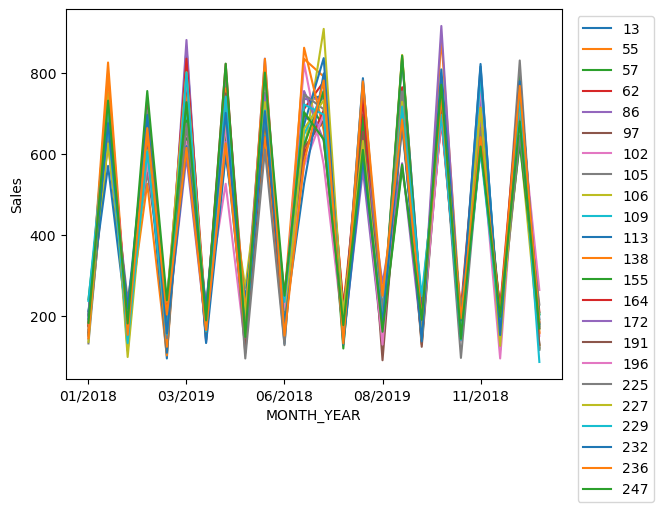

In [18]:
pivot_chips2.plot()
plt.legend(loc = "upper right", bbox_to_anchor = (1.20, 1))
plt.ylabel("Sales")
plt.show()

In [19]:
#LOOKING AT THE CORRELATION DEEPER FOR THE FOLLOWING STORES

pivot_chips2.corr(method= "pearson")

STORE_NBR,13,55,57,62,86,97,102,105,106,109,...,164,172,191,196,225,227,229,232,236,247
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
13,1.000000,0.965697,0.971533,0.976180,0.986103,0.969053,0.948818,0.958325,0.944657,0.976078,...,0.971079,0.945253,0.979644,0.965274,0.966221,0.983544,0.980579,0.963032,0.946107,0.959262
55,0.965697,1.000000,0.937764,0.970205,0.963049,0.964237,0.947357,0.946778,0.947041,0.958715,...,0.956999,0.927177,0.957787,0.950261,0.960898,0.967508,0.973889,0.930150,0.937212,0.927585
57,0.971533,0.937764,1.000000,0.962742,0.960103,0.976873,0.961340,0.954420,0.922478,0.964428,...,0.949539,0.960454,0.962508,0.934443,0.966362,0.959026,0.962333,0.960742,0.945462,0.968414
62,0.976180,0.970205,0.962742,1.000000,0.977097,0.970244,0.955591,0.961342,0.968237,0.984722,...,0.958590,0.939826,0.969791,0.967112,0.963863,0.982260,0.966539,0.972618,0.951473,0.947053
86,0.986103,0.963049,0.960103,0.977097,1.000000,0.977604,0.952501,0.965042,0.958954,0.974102,...,0.967601,0.953557,0.983691,0.973261,0.955770,0.986171,0.986264,0.962529,0.947883,0.973357
97,0.969053,0.964237,0.976873,0.970244,0.977604,1.000000,0.978103,0.965740,0.944852,0.975323,...,0.971554,0.963821,0.980694,0.967129,0.972537,0.976131,0.977687,0.962445,0.966307,0.970985
102,0.948818,0.947357,0.961340,0.955591,0.952501,0.978103,1.000000,0.920554,0.925444,0.967860,...,0.924159,0.961801,0.952279,0.930361,0.968121,0.954414,0.943891,0.936911,0.945903,0.937117
105,0.958325,0.946778,0.954420,0.961342,0.965042,0.965740,0.920554,1.000000,0.939857,0.945928,...,0.978443,0.947819,0.966927,0.968435,0.939345,0.970728,0.972225,0.957845,0.964744,0.964519
106,0.944657,0.947041,0.922478,0.968237,0.958954,0.944852,0.925444,0.939857,1.000000,0.974992,...,0.941228,0.910802,0.956781,0.943272,0.950814,0.964371,0.948499,0.957778,0.947862,0.918759


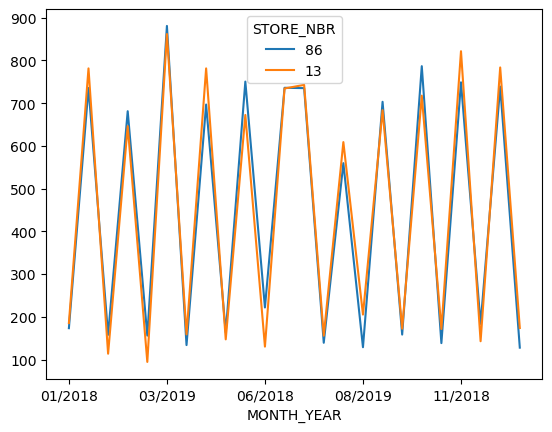

In [21]:
#IT SEEMS STORE 86 AND STORE 13 HAVE STRONGEST CORRELATION (CLOSER TO 1)
#GRAPHING IT

chips2_graph = pivot_chips2[[86, 13]]
chips2_graph.plot()
plt.show()

#NEAR PERFECT CORRELATION

In [23]:
total_grp_pivot_table[86].sort_values(ascending=False).head(20)

STORE_NBR
193    1.000000
86     1.000000
31     1.000000
88     0.988901
207    0.988032
49     0.987881
229    0.986264
227    0.986171
13     0.986103
116    0.984538
147    0.983749
191    0.983691
201    0.982692
199    0.982686
194    0.982278
230    0.982087
184    0.981948
26     0.981424
190    0.980195
72     0.979623
Name: 86, dtype: float64

In [24]:
#SHOWS THE TOP 20 CORRELATION WITH STORE 86, AND 88 COULD HAVE BEEN A BETTER CORRELATION
#DORTING TOTAL SALES TO SEE THE STRONGEST CORRELATION (FOR TOP5)
total_sorted.loc[[193, 86, 31, 88, 207]]

STORE_NBR
193       13.10
86     10635.35
31        14.80
88     16333.25
207    10317.20
Name: TOT_SALES, dtype: float64

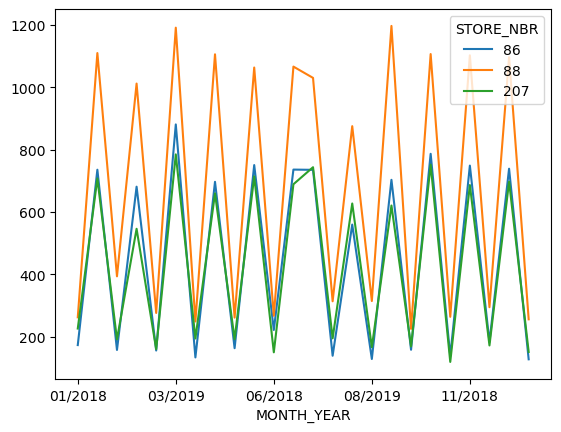

In [25]:
#STORE 13 AND 31 TOO LOW TO USE
#GROUPING 86, 88, 207 INTO A DATAFRAME
three_group_86 = total_grp[[88, 207, 86]]

group_86_df = pd.DataFrame(three_group_86)

#PIVOTING THE DATAFRAME

group_86_pivot = group_86_df.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values= "TOT_SALES")
group_86_pivot.plot()
plt.show()

In [26]:
#IT SEEMS 207 IS MUCH MORE BETTER FIT WITH STORE 86

In [27]:
#LOOKING FOR CONTROL STORE FOR STORE 88
total_grp_pivot_table[88].sort_values(ascending=False).head(10)

STORE_NBR
88     1.000000
193    1.000000
31     1.000000
116    0.990014
49     0.989593
86     0.988901
191    0.988483
13     0.984478
227    0.984342
199    0.984042
Name: 88, dtype: float64

In [30]:
#REPEATING THE STEPS AGAIN
total_sorted.loc[[88,    
193,    
31,     
116,    
49,     
86,     
191,    
13,    
227,    
199,    ]]

STORE_NBR
88     16333.25
193       13.10
31        14.80
116    10354.50
49     13287.70
86     10635.35
191    10404.70
13     10686.50
227    10622.50
199    14797.00
Name: TOT_SALES, dtype: float64

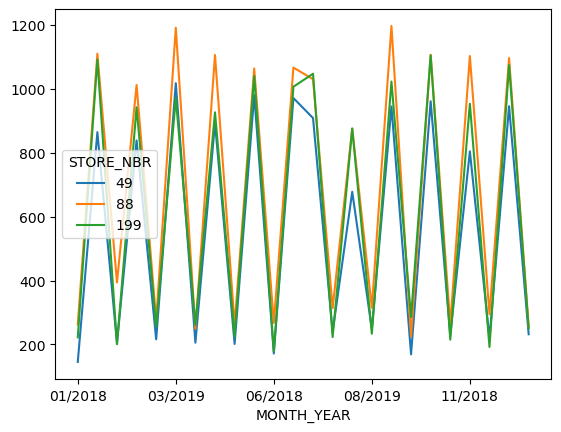

In [31]:
#AGAIN STORE 193, 31 SALES TOO LOW TO CONSIDER
#TAKING STORE 49, 199, 88 IN A GROUP

three_group_88 = total_grp[[49, 199, 88]]
group_88_df = pd.DataFrame(three_group_88)
group_88_pivot = group_88_df.pivot_table(index= "MONTH_YEAR", columns= "STORE_NBR", values= "TOT_SALES")
group_88_pivot.plot()
plt.show()

In [32]:
#STORE 199 SEEMS MORE CORRELATED TO STORE 88
sorted_88 = total_grp_pivot_table[88].sort_values(ascending = False)
sorted_88[199]

0.9840416990253192

In [33]:
#FOR TRIAL STORE 88 WE WILL USE STORE 199 AS CORRELATION IS 0.984

In [49]:
#CREATING NEW DATAFRAME FOR TRIAL AND CONTROL STORE
trial_store_77 = dataset.loc[dataset["STORE_NBR"]== 77]
control_store_141= dataset.loc[dataset["STORE_NBR"]== 141]

trial_store_86 = dataset.loc[dataset["STORE_NBR"]== 86]
control_store_13 = dataset.loc[dataset["STORE_NBR"]== 13]

trial_store_88 = dataset.loc[dataset["STORE_NBR"]== 88]
control_store_199 = dataset.loc[dataset["STORE_NBR"]== 199]

trial_store_77

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_YEAR
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,03/2019
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,04/2019
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,09/2018
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,02/2019
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,01/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264818,2330321,2018-07-30,77,236756,71,Twisties Cheese Burger 250g,2,8.6,250,TWISTIES,YOUNG SINGLES/COUPLES,Mainstream,07/2018
264819,2330331,2018-11-18,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget,11/2018
264820,2330431,2018-07-31,77,236770,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,OLDER SINGLES/COUPLES,Mainstream,07/2018
264821,2330461,2018-07-21,77,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110,INFUZIONS,OLDER FAMILIES,Budget,07/2018


In [50]:
#INFORMATION MATCHING WITH STORE 77 AND 271
trial_store_77[["TOT_SALES", "PROD_QTY"]].sum()

TOT_SALES    3040.0
PROD_QTY      872.0
dtype: float64

In [51]:
control_store_141[["TOT_SALES", "PROD_QTY"]].sum()

TOT_SALES    3025.4
PROD_QTY      686.0
dtype: float64

In [52]:
#LOOKING AT REPEAT CUSTOMERS FOR TRIAL STORE
trial_store_77["LYLTY_CARD_NBR"].value_counts()

77476      5
77344      4
77093      4
77305      4
77454      4
          ..
77298      1
77110      1
77304      1
77108      1
2330501    1
Name: LYLTY_CARD_NBR, Length: 356, dtype: int64

In [53]:
#TOTAL CUSTOMER TRANSACTIONS
trial_store_77[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    563
dtype: int64

In [54]:
#LOOKING AT REPEAT CUSTOMERS FOR CONTROL STORE
control_store_141["LYLTY_CARD_NBR"].value_counts()

141318    4
141362    4
141025    4
141279    4
141236    4
         ..
141229    1
141230    1
141080    1
141077    1
141257    1
Name: LYLTY_CARD_NBR, Length: 269, dtype: int64

In [55]:
#TOTAL CUSTOMER TRANSACTIONS
control_store_141[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    453
dtype: int64

In [56]:
#COUNTING REPEAT CUSTOMERS THAT PURCHASED MORE THAN ONCE
repeat_customers = trial_store_77["LYLTY_CARD_NBR"].value_counts()
print(repeat_customers.head(24))
repeats_total = 24

77476    5
77344    4
77093    4
77305    4
77454    4
77313    4
77338    4
77109    4
77066    4
77205    4
77080    3
77111    3
77077    3
77383    3
77102    3
77069    3
77308    3
77390    3
77000    3
77114    3
77300    3
77136    3
77163    3
77206    3
Name: LYLTY_CARD_NBR, dtype: int64


In [59]:
#GROUPING STORES BY MONTH
grouped77 = trial_store_77.groupby("MONTH_YEAR")
grouped141 = control_store_141.groupby("MONTH_YEAR")

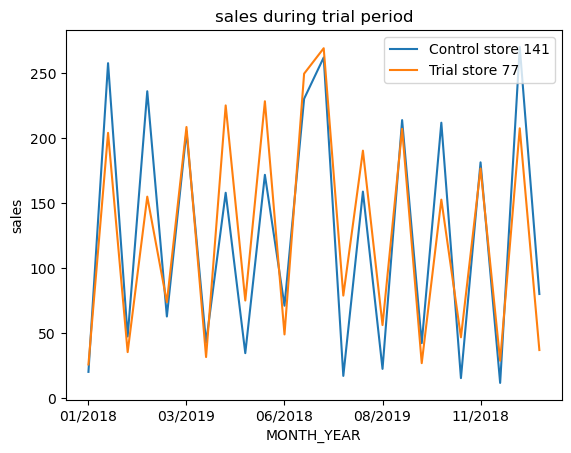

In [98]:
grouped141["TOT_SALES"].sum().plot(label = "Control store 141")
grouped77["TOT_SALES"].sum().plot(label = "Trial store 77")
plt.ylabel("sales")
plt.legend()
plt.title("sales during trial period")
plt.show()

In [99]:
#FOR STORES 86 AND 13
trial_store_86[["TOT_SALES", "PROD_QTY"]].sum()

TOT_SALES    10635.35
PROD_QTY      3066.00
dtype: float64

In [100]:
control_store_13[["TOT_SALES", "PROD_QTY"]].sum()

TOT_SALES    10686.5
PROD_QTY      3105.0
dtype: float64

In [101]:
#LOOKING AT REPEAT CUSTOMERS FOR CONTROL STORE
control_store_13["LYLTY_CARD_NBR"].value_counts()

13138    17
13177    15
13037    14
13204    13
13017    13
         ..
13236     2
13157     2
13215     2
13074     1
13198     1
Name: LYLTY_CARD_NBR, Length: 248, dtype: int64

In [103]:
#TOTAL CUSTOMER TRANSACTIONS
control_store_13[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    1564
dtype: int64

In [104]:
#COUNTING REPEAT CUSTOMERS THAT PURCHASED MORE THAN ONCE
repeat_customers_86 = trial_store_86["LYLTY_CARD_NBR"].value_counts()
repeat_customers_86.iloc[:125]

86112    13
86133    13
86151    12
86008    12
86075    12
         ..
86236     6
86005     6
86242     6
86098     6
86004     6
Name: LYLTY_CARD_NBR, Length: 125, dtype: int64

In [105]:
#LOOKING FOR REPEAT CUSTOMERS IN CONTROL STORE
control_store_13[["LYLTY_CARD_NBR"]].value_counts()

LYLTY_CARD_NBR
13138             17
13177             15
13037             14
13204             13
13017             13
                  ..
13236              2
13157              2
13215              2
13074              1
13198              1
Length: 248, dtype: int64

In [106]:
#TOTAL CUSTOMER TRANSACTIONS
control_store_13[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    1564
dtype: int64

In [107]:
repeat_customers_13 = control_store_13["LYLTY_CARD_NBR"].value_counts()
repeat_customers_13.iloc[:115]

13138    17
13177    15
13037    14
13204    13
13017    13
         ..
13079     7
13035     7
13174     7
13241     7
13151     6
Name: LYLTY_CARD_NBR, Length: 115, dtype: int64

In [110]:
#GROUPING STORES BY MONTH
grouped86 = trial_store_86.groupby("MONTH_YEAR")
grouped13 = control_store_13.groupby("MONTH_YEAR")

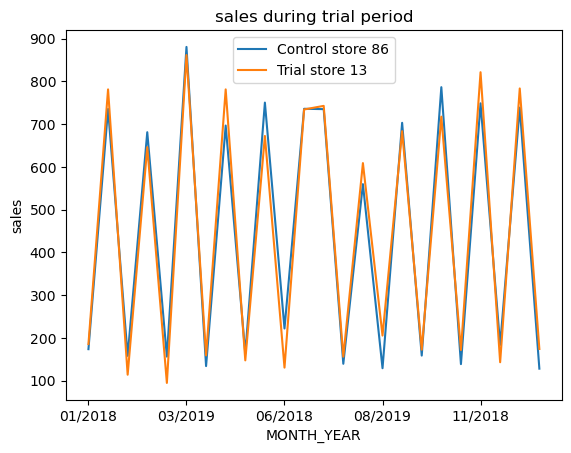

In [111]:
grouped86["TOT_SALES"].sum().plot(label = "Control store 86")
grouped13["TOT_SALES"].sum().plot(label = "Trial store 13")
plt.ylabel("sales")
plt.legend()
plt.title("sales during trial period")
plt.show()

In [71]:
#FOR STORES 88 AND 199
trial_store_88[["TOT_SALES", "PROD_QTY"]].sum()

TOT_SALES    16333.25
PROD_QTY      3718.00
dtype: float64

In [72]:
control_store_199[["TOT_SALES", "PROD_QTY"]].sum()

TOT_SALES    14797.0
PROD_QTY      3343.0
dtype: float64

In [74]:
#REPEAT CUSTOMERS IN TRIAL STORE
trial_store_88["LYLTY_CARD_NBR"].value_counts()

88105      13
88358      11
88247      11
88153      10
88352      10
           ..
88046       1
88355       1
88196       1
88220       1
2373711     1
Name: LYLTY_CARD_NBR, Length: 388, dtype: int64

In [75]:
#TOTAL CUSTOMER TRANSACTIONS
trial_store_88[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    1873
dtype: int64

In [76]:
#COUNTING REPEAT CUSTOMERS THAT PURCHASED MORE THAN ONCE
#145 REPEAT CUSTOMERS FOR STORE 199
repeat_customers_88 = trial_store_86["LYLTY_CARD_NBR"].value_counts()
repeat_customers_88.iloc[:146]

86112    13
86133    13
86151    12
86008    12
86075    12
         ..
86040     5
86184     5
86178     5
86213     5
86029     5
Name: LYLTY_CARD_NBR, Length: 146, dtype: int64

In [77]:
#REPEAT CUSTOMERS IN CONTROL STORE
control_store_199["LYLTY_CARD_NBR"].value_counts()

199146    13
199157    13
199318    12
199005    12
199317    11
          ..
199118     1
199269     1
199083     1
199115     1
199105     1
Name: LYLTY_CARD_NBR, Length: 376, dtype: int64

In [78]:
#TOTAL CUSTOMER TRANSACTIONS
control_store_199[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    1687
dtype: int64

In [79]:
#WE HAVE REPEAT CUSTOMERS FOR STORE 86
repeat_customer_199 = control_store_199["LYLTY_CARD_NBR"].value_counts()
repeat_customer_199.iloc[:110]

199146    13
199157    13
199318    12
199005    12
199317    11
          ..
199345     6
199341     6
199356     6
199278     6
199148     6
Name: LYLTY_CARD_NBR, Length: 110, dtype: int64

In [80]:
#GROUPING STORES BY MONTH
grouped88 = trial_store_88.groupby("MONTH_YEAR")
grouped199 = control_store_199.groupby("MONTH_YEAR")

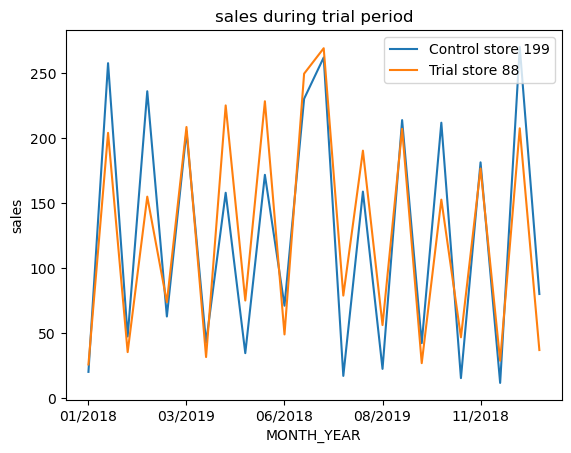

In [81]:
grouped141["TOT_SALES"].sum().plot(label = "Control store 199")
grouped77["TOT_SALES"].sum().plot(label = "Trial store 88")
plt.ylabel("sales")
plt.legend()
plt.title("sales during trial period")
plt.show()

In [88]:
#STACKING AVERAGE STRANSACTION PER CUSTOMER

grouped77["LYLTY_CARD_NBR"].value_counts().mean()


1.0387453874538746

In [89]:
grouped141["LYLTY_CARD_NBR"].value_counts().mean()

1.0389908256880733

In [112]:
grouped86["LYLTY_CARD_NBR"].value_counts().mean()

1.1821675634127595

In [113]:
grouped13["LYLTY_CARD_NBR"].value_counts().mean()

1.1830559757942511

In [91]:
grouped88["LYLTY_CARD_NBR"].value_counts().mean()


1.1344639612356149

In [92]:
grouped199["LYLTY_CARD_NBR"].value_counts().mean()


1.1398648648648648

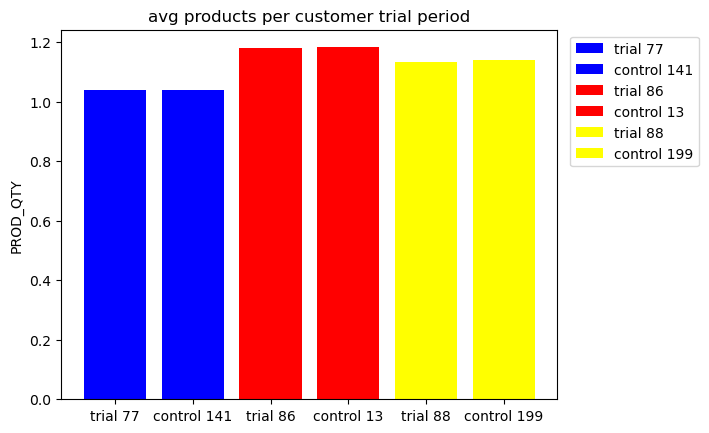

In [115]:
group1 = ["trial 77", "control 141"]
group2 = ["trial 86", "control 13"]
group3 = ['trial 88', 'control 199']
values_grp_1 = [1.0387453874538746, 1.0389908256880733]
values_grp_2 = [1.1821675634127595, 1.1830559757942511]
values_grp_3 = [1.1344639612356149, 1.1398648648648648]

plt.bar(group1, values_grp_1, label = group1, color = "blue")
plt.bar(group2, values_grp_2, label = group2, color = "red")
plt.bar(group3, values_grp_3, label = group3, color = "yellow")

plt.ylabel("PROD_QTY")
plt.legend(loc = "upper right", bbox_to_anchor = (1.3,1))
plt.title('avg products per customer trial period')
plt.show()
